In [1]:
# Apagar warnings en importacion de datos
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Importa la libreria pandas
from pandas import *

In [3]:
# Importa matplot
import matplotlib.pyplot as plt

In [4]:
# For regular expressions
import re
import numpy as np

In [5]:
# Descarga la información directamente desde el sitio web (World Bank)
data = read_excel('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel', sheet_name=0, skiprows=3)
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN


In [6]:
# Crea un dataframe vacio
dfp = DataFrame()
dfp

""


In [7]:
# Al dataframe vacio se le agrega la columna Country Name
dfp['Country'] = data['Country Name']
dfp

,Country
0,Aruba
1,Afghanistan
2,Angola
3,Albania
4,Andorra
...,...
259,Kosovo
260,"Yemen, Rep."
261,South Africa
262,Zambia


In [8]:
# Se agrega la columan del año 2018
dfp['Population'] = data['2018']
dfp

,Country,Population
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0
...,...,...
259,Kosovo,1845300.0
260,"Yemen, Rep.",28498687.0
261,South Africa,57779622.0
262,Zambia,17351822.0


In [9]:
# Descarga la información directamente desde el sitio web (World Health Organization)
data = read_csv('https://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MDG_0000000017,TB_e_mort_exc_tbhiv_num&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO')
data

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)
0,Afghanistan,2018,11000 [6400-16000],29 [17-44]
1,Afghanistan,2017,11000 [6400-16000],30 [18-45]
2,Afghanistan,2016,12000 [7100-18000],34 [20-51]
3,Afghanistan,2015,14000 [8000-20000],39 [23-59]
4,Afghanistan,2014,14000 [8400-22000],43 [25-65]
...,...,...,...,...
3647,Zimbabwe,2004,3000 [1200-5600],25 [10-47]
3648,Zimbabwe,2003,2900 [1200-5400],24 [9.6-45]
3649,Zimbabwe,2002,2500 [990-4800],21 [8.3-40]
3650,Zimbabwe,2001,2800 [1100-5300],23 [9.1-44]


In [10]:
# Crea un dataframe vacio
dfh = DataFrame()
dfh

""


In [11]:
# Al dataframe vacio se le agrega la columna Country filtrando el anyo 2018
dfh = data.loc[data.Year.isin(['2018']),['Country']].reset_index(drop=True)
dfh

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
189,Venezuela (Bolivarian Republic of)
190,Viet Nam
191,Yemen
192,Zambia


In [12]:
# Se agrega la columan del año 2018
dfh['Deaths'] = data.loc[data.Year.isin(['2018']),['Number of deaths due to tuberculosis, excluding HIV']].reset_index(drop=True)
dfh

,Country,Deaths
0,Afghanistan,11000 [6400-16000]
1,Albania,8 [4-14]
2,Algeria,3200 [2100-4600]
3,Andorra,0 [0-0]
4,Angola,19000 [11000-28000]
...,...,...
189,Venezuela (Bolivarian Republic of),730 [690-780]
190,Viet Nam,11000 [6700-15000]
191,Yemen,2000 [1400-2600]
192,Zambia,4800 [2900-7300]


In [13]:
# Update a column (Get only the first value before white space)
dfh['Deaths'] = dfh['Deaths'].str.split(' ', n = 1, expand = True)[0]
dfh

,Country,Deaths
0,Afghanistan,11000
1,Albania,8
2,Algeria,3200
3,Andorra,0
4,Angola,19000
...,...,...
189,Venezuela (Bolivarian Republic of),730
190,Viet Nam,11000
191,Yemen,2000
192,Zambia,4800


In [14]:
# Cleaning data
# Se redefine el index del data frame
dfp.set_index('Country',inplace=True)

In [15]:
# Delete rows
dfp = dfp.drop(['World',
'High income',
'OECD members',
'Post-demographic dividend',
'IDA & IBRD total',
'Low & middle income',
'Middle income',
'IBRD only',
'East Asia & Pacific',
'Upper middle income',
'Europe & Central Asia',
'North America',
'Late-demographic dividend',
'European Union',
'East Asia & Pacific (excluding high income)',
'East Asia & Pacific (IDA & IBRD countries)',
'Euro area',
'Early-demographic dividend',
'Lower middle income',
'Latin America & Caribbean',
'Latin America & Caribbean (excluding high income)',
'Europe & Central Asia (IDA & IBRD countries)',
'Middle East & North Africa',
'Middle East & North Africa (IDA & IBRD countries)',
'Middle East & North Africa (excluding high income)',
'South Asia',
'South Asia (IDA & IBRD)',
'Europe & Central Asia (excluding high income)',
'Arab World',
'IDA total',
'Latin America & the Caribbean (IDA & IBRD countries)',
'Sub-Saharan Africa (IDA & IBRD countries)',
'Sub-Saharan Africa',
'Sub-Saharan Africa (excluding high income)',
'Central Europe and the Baltics',
'Pre-demographic dividend',
'IDA only',
'Least developed countries: UN classification',
'IDA blend',
'Fragile and conflict affected situations',
'Heavily indebted poor countries (HIPC)',
'Low income',
'Small states',
'Other small states',
'Not classified',
'Caribbean small states',
'West Bank and Gaza',
'Pacific island small states'])

In [16]:
# Reorder info
dfp.sort_index(axis = 0) 

,Population
Country,
Afghanistan,37172386.0
Albania,2866376.0
Algeria,42228429.0
American Samoa,55465.0
Andorra,77006.0
...,...
Vietnam,95540395.0
Virgin Islands (U.S.),106977.0
"Yemen, Rep.",28498687.0


In [17]:
# Merge data
dfm = merge(dfp, dfh , on='Country', how='outer')
dfm

,Country,Population,Deaths
0,Aruba,105845.0,NaN
1,Afghanistan,37172386.0,11000
2,Angola,30809762.0,19000
3,Albania,2866376.0,8
4,Andorra,77006.0,0
...,...,...,...
239,United Republic of Tanzania,NaN,22000
240,United States of America,NaN,580
241,Venezuela (Bolivarian Republic of),NaN,730
242,Viet Nam,NaN,11000


In [18]:
# Save data on disk
dfm.to_csv('data_mege.csv')

In [19]:
# Duplicated records after full outer join merge
print(dfm[
          dfm['Country'].apply(lambda x: bool(re.match('United States',x)))
         ])
print("First row")
print(dfm[
          dfm['Country'].apply(lambda x: bool(re.match('United States',x)))
         ].head(1))
print("Second row")
print(dfm[
          dfm['Country'].apply(lambda x: bool(re.match('United States',x)))
         ].tail(1))

                      Country   Population Deaths
202             United States  327167434.0    NaN
240  United States of America          NaN    580
First row
           Country   Population Deaths
202  United States  327167434.0    NaN
Second row
                      Country  Population Deaths
240  United States of America         NaN    580


In [20]:
dfm.to_csv('data_export.csv', index=False)

In [21]:
# Fix data for USA
print(dfm.loc[dfm.Country.isin(['United States']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['United States of America']),['Deaths']])

dfm.loc[dfm.Country.isin(['United States']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['United States of America']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['United States']),['Deaths']])

    Deaths
202    NaN
    Deaths
240    580
===
    Deaths
202    580


In [22]:
# Fix data for Venezuela
print(dfm[dfm['Country'].apply(lambda x: bool(re.match('Venezuela',x)))])

print(dfm.loc[dfm.Country.isin(['Venezuela, RB']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['Venezuela (Bolivarian Republic of)']),['Deaths']])

                                Country  Population Deaths
205                       Venezuela, RB  28870195.0    NaN
241  Venezuela (Bolivarian Republic of)         NaN    730
    Deaths
205    NaN
    Deaths
241    730


In [23]:
dfm.loc[dfm.Country.isin(['Venezuela, RB']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['Venezuela (Bolivarian Republic of)']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['Venezuela, RB']),['Deaths']])

===
    Deaths
205    730


In [24]:
# Fix data for BAHAMAS
print(dfm.loc[dfm.Country.isin(['Bahamas, The']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['Bahamas']),['Deaths']])

dfm.loc[dfm.Country.isin(['Bahamas, The']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['Bahamas']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['Bahamas, The']),['Deaths']])

   Deaths
20    NaN
    Deaths
216      1
===
   Deaths
20      1


In [25]:
# Fix data for DEMOCRATIC CONGO
print(dfm.loc[dfm.Country.isin(['Congo, Dem. Rep']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['Democratic Republic of the Congo']),['Deaths']])

dfm.loc[dfm.Country.isin(['Congo, Dem. Rep']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['Democratic Republic of the Congo']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['Congo, Dem. Rep']),['Deaths']])

Empty DataFrame
Columns: [Deaths]
Index: []
    Deaths
223  43000
===
Empty DataFrame
Columns: [Deaths]
Index: []


In [26]:
# Fix data for CONGO
print(dfm.loc[dfm.Country.isin(['Congo, Rep.']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['Congo']),['Deaths']])

dfm.loc[dfm.Country.isin(['Congo, Rep.']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['Congo']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['Congo, Rep.']),['Deaths']])

   Deaths
40    NaN
    Deaths
218   3000
===
   Deaths
40   3000


In [27]:
# Fix data for CZECH REPUBLIC
print(dfm.loc[dfm.Country.isin(['Czech Republic']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['Czechia']),['Deaths']])

dfm.loc[dfm.Country.isin(['Czech Republic']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['Czechia']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['Czech Republic']),['Deaths']])

   Deaths
49    NaN
    Deaths
221     37
===
   Deaths
49     37


In [28]:
# Fix data for EGYPT
print(dfm.loc[dfm.Country.isin(['Egypt, Arab Rep.']),['Deaths']])
print(dfm.loc[dfm.Country.isin(['Egypt']),['Deaths']])

dfm.loc[dfm.Country.isin(['Egypt, Arab Rep.']),['Deaths']] = int(dfm.loc[dfm.Country.isin(['Egypt']),['Deaths']].iloc[0]['Deaths'])
print("===")
print(dfm.loc[dfm.Country.isin(['Egypt, Arab Rep.']),['Deaths']])

   Deaths
57    NaN
    Deaths
224    420
===
   Deaths
57    420


In [29]:
# Delete not needen rows
dfm = dfm.set_index("Country")
dfm = dfm.drop("United States of America", axis=0) # Delete all rows with label "'United States of America' "
dfm = dfm.drop("Venezuela (Bolivarian Republic of)", axis=0)
dfm = dfm.drop("Bahamas", axis=0)
#dfm = dfm.drop("CÃ´te d'Ivoire", axis=0)
dfm = dfm.drop("Democratic Republic of the Congo", axis=0)
dfm = dfm.drop("Congo", axis=0)
dfm = dfm.drop("Czechia", axis=0)
dfm = dfm.drop("Egypt", axis=0)

# Fillig NaN
dfm = dfm.fillna(value=0)
dfm
print (dfm)

                                                    Population Deaths
Country                                                              
Aruba                                                 105845.0      0
Afghanistan                                         37172386.0  11000
Angola                                              30809762.0  19000
Albania                                              2866376.0      8
Andorra                                                77006.0      0
...                                                        ...    ...
Republic of North Macedonia                                0.0     20
United Kingdom of Great Britain and Northern Ir...         0.0    300
United Republic of Tanzania                                0.0  22000
Viet Nam                                                   0.0  11000
Yemen                                                      0.0   2000

[237 rows x 2 columns]


In [30]:
# Save data on disk after some cleaning
dfm.to_csv('data_mege_cleaner.csv')

#Convierte datos float a int para operar
dfm['Deaths']= dfm['Deaths'].astype(int) 
dfm['Population']= dfm['Population'].astype(int) 

# New column muertes/poblacion
ip = (dfm['Deaths']/dfm['Population'])
dfm['Deaths/Population'] = ip
dfm
print(dfm)

                                                    Population  Deaths  \
Country                                                                  
Aruba                                                   105845       0   
Afghanistan                                           37172386   11000   
Angola                                                30809762   19000   
Albania                                                2866376       8   
Andorra                                                  77006       0   
...                                                        ...     ...   
Republic of North Macedonia                                  0      20   
United Kingdom of Great Britain and Northern Ir...           0     300   
United Republic of Tanzania                                  0   22000   
Viet Nam                                                     0   11000   
Yemen                                                        0    2000   

                                     

In [31]:
#Datos estadisticos de la poblacion
print("---Datos estadisticos poblacion---")
print("La media de la poblacion es:", dfm['Population'].mean())
print("La mediana de la poblacion es:", dfm['Population'].median())
print("La desviacion de la poblacion es:", dfm['Population'].std(ddof=0))

---Datos estadisticos poblacion---
La media de la poblacion es: 31910017.75949367
La mediana de la poblacion es: 4999441.0
La desviacion de la poblacion es: 130848086.7291877


In [32]:
#Datos estadisticos de muertes
print("---Datos estadisticos muertes---")
print("La media de la muerte es:", dfm['Deaths'].mean())
print("La mediana de la muerte es:", dfm['Deaths'].median())
print("La desviacion de la muerte es:", dfm['Deaths'].std(ddof=0))

---Datos estadisticos muertes---
La media de la muerte es: 5059.029535864979
La mediana de la muerte es: 71.0
La desviacion de la muerte es: 30655.169627752843


In [33]:
#Datos estadisticos de muertes/poblacion
print("---Datos estadisticos muertes/poblacion---")
print("La media de la muerte es:", dfm['Deaths/Population'].mean())
print("La mediana de la muerte es:", dfm['Deaths/Population'].median())
print("La desviacion de la muerte es:", dfm['Deaths/Population'].std(ddof=0))

---Datos estadisticos muertes/poblacion---
La media de la muerte es: inf
La mediana de la muerte es: 2.2915048858249813e-05
La desviacion de la muerte es: nan


In [34]:
#Reemplazar NaN e infinitos
print("Reemplaza NaN e Infinitos")
dfm = dfm.fillna(value=0)
print(dfm)

Reemplaza NaN e Infinitos
                                                    Population  Deaths  \
Country                                                                  
Aruba                                                   105845       0   
Afghanistan                                           37172386   11000   
Angola                                                30809762   19000   
Albania                                                2866376       8   
Andorra                                                  77006       0   
...                                                        ...     ...   
Republic of North Macedonia                                  0      20   
United Kingdom of Great Britain and Northern Ir...           0     300   
United Republic of Tanzania                                  0   22000   
Viet Nam                                                     0   11000   
Yemen                                                        0    2000   

           

In [35]:
#top paises mas poblados
print("top 10 paises mas poblados")
top1 = dfm.sort_values('Population',ascending=False)
print(top1.head(10))

top 10 paises mas poblados
                    Population  Deaths  Deaths/Population
Country                                                  
China               1392730000   37000           0.000027
India               1352617328  440000           0.000325
United States        327167434     580           0.000002
Indonesia            267663435   93000           0.000347
Pakistan             212215030   43000           0.000203
Brazil               209469333    4800           0.000023
Nigeria              195874740  125000           0.000638
Bangladesh           161356039   47000           0.000291
Russian Federation   144478050    9200           0.000064
Japan                126529100    2800           0.000022


In [36]:
#top paises con mas muertes
print("top 10 paises con mas muertes")
top2 = dfm.sort_values('Deaths',ascending=False)
print(top2.head(10))

top 10 paises con mas muertes
                             Population  Deaths  Deaths/Population
Country                                                           
India                        1352617328  440000           0.000325
Nigeria                       195874740  125000           0.000638
Indonesia                     267663435   93000           0.000347
Bangladesh                    161356039   47000           0.000291
Pakistan                      212215030   43000           0.000203
China                        1392730000   37000           0.000027
Philippines                   106651922   26000           0.000244
Ethiopia                      109224559   24000           0.000220
United Republic of Tanzania           0   22000                inf
Myanmar                        53708395   21000           0.000391


In [37]:
#top paises con mas muertes/poblacion
print("top 10 paises con mas muertes/poblacion")
top3 = dfm.sort_values('Deaths/Population',ascending=False)
print(top3.head(10))

top 10 paises con mas muertes/poblacion
                                                    Population  Deaths  \
Country                                                                  
Yemen                                                        0    2000   
Republic of Korea                                            0    2400   
United Kingdom of Great Britain and Northern Ir...           0     300   
Slovakia                                                     0      35   
Saint Vincent and the Grenadines                             0       2   
Saint Lucia                                                  0       4   
Democratic People's Republic of Korea                        0   20000   
Saint Kitts and Nevis                                        0       1   
Republic of Moldova                                          0     210   
Bolivia (Plurinational State of)                             0    1200   

                                                    Deaths/Population  

In [38]:
#Resumen estadistico
print (dfm)
print (dfm.describe())

                                                    Population  Deaths  \
Country                                                                  
Aruba                                                   105845       0   
Afghanistan                                           37172386   11000   
Angola                                                30809762   19000   
Albania                                                2866376       8   
Andorra                                                  77006       0   
...                                                        ...     ...   
Republic of North Macedonia                                  0      20   
United Kingdom of Great Britain and Northern Ir...           0     300   
United Republic of Tanzania                                  0   22000   
Viet Nam                                                     0   11000   
Yemen                                                        0    2000   

                                     

AxesSubplot(0.125,0.125;0.775x0.755)


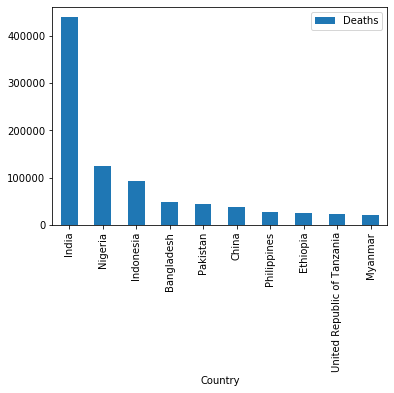

In [39]:
# Garficar
del dfm['Population']
del dfm['Deaths/Population']
ax = dfm.sort_values('Deaths',ascending=False)
print(ax.head(10).plot.bar())
plt.show()

In [40]:
# Resumen estadístico
print (dfm.describe())

              Deaths
count     237.000000
mean     5059.029536
std     30720.048366
min         0.000000
25%         1.000000
50%        71.000000
75%      1200.000000
max    440000.000000
